In [1]:
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! pip install optuna


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
import pandas as pd
import numpy as np

import optuna

import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



In [4]:
df = pd.read_excel('marketing_campaign.xlsx')

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.rename(columns={'MntWines': 'Wines',
                     'MntFruits': 'Fruits',
                     'MntMeatProducts': 'Meat',
                     'MntFishProducts': 'Fish',
                     'MntSweetProducts': 'Sweet',
                     'MntGoldProds': 'Gold',
                     'NumDealsPurchases': 'Discount_Purchases',
                     'NumWebPurchases': 'Web_Purchases',
                     'NumCatalogPurchases': 'Catalog_Purchases',
                     'NumStorePurchases': 'Store_Purchases'}, inplace=True)

In [8]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
df.describe()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [10]:
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)


In [11]:
imputer = SimpleImputer(strategy='mean')
df['Income'] = imputer.fit_transform(df[['Income']])

In [12]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
# Extract year, month, and day as separate features
df['Year_Customer'] = df['Dt_Customer'].dt.year
df['Month_Customer'] = df['Dt_Customer'].dt.month
df['Day_Customer'] = df['Dt_Customer'].dt.day

In [13]:
# Feature Selection
features = ['Year_Birth', 'Income', 'Wines', 'Fruits', 'Meat', 
            'Fish', 'Sweet', 'Gold']
X = df[features]

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

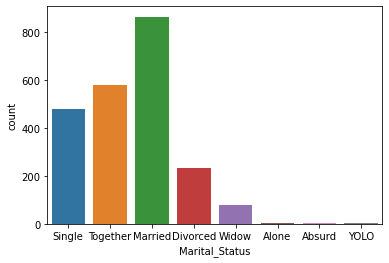

In [14]:
sns.countplot(data=df,x=df['Marital_Status'])

In [15]:
df['Age']=2023-df['Year_Birth']

In [16]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
maxx= df['Age'].max()
minn=df['Age'].min()
print(q1)
print(q3)
print(minn)
print(maxx)

46.0
64.0
27
130


In [17]:
labels = ['27-46','47-64','65+']
ranges=[0,46,64,83]
df['Age_Cate']=pd.cut(df['Age'],bins=ranges,labels=labels)


<AxesSubplot:xlabel='Age_Cate', ylabel='count'>

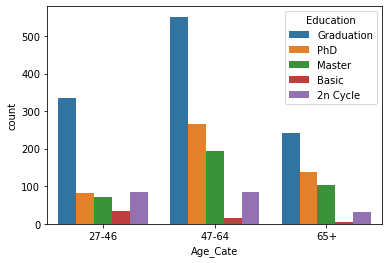

In [18]:
sns.countplot(data=df,x=df['Age_Cate'],hue=df['Education'])

In [19]:
df2 =df.iloc[:,4:14]

<AxesSubplot:>

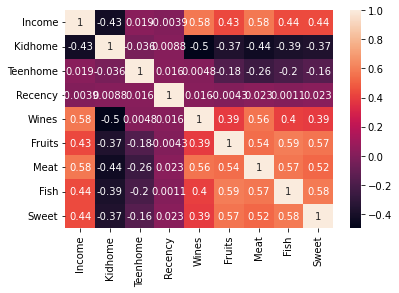

In [20]:
sns.heatmap(df2.corr(),annot=True)

In [21]:
# Normalize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


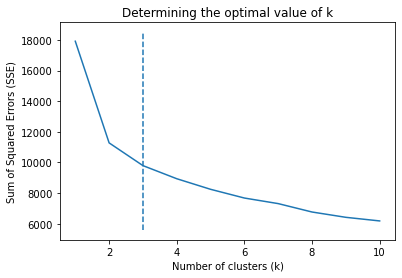

Optimal number of clusters (k): 3


In [22]:
# determining the optimal value of K
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)
    
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
optimal_k = kl.elbow

# result visualization
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Determining the optimal value of k')
plt.plot(range(1, 11), sse)
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

print("Optimal number of clusters (k):", optimal_k)

In [23]:
# client clustering with K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)
df['Cluster'] = kmeans.labels_

In [24]:
# Analyze the Segments
for i in range(optimal_k):
    print(f"--- Cluster {i} ---")
    segment = df[df['Cluster'] == i]
    print(segment[features].describe())

--- Cluster 0 ---
        Year_Birth         Income        Wines      Fruits         Meat  \
count   468.000000     468.000000   468.000000  468.000000   468.000000   
mean   1969.395299   76379.510695   556.583333   81.829060   476.651709   
std      12.927724   30457.623053   297.839572   50.508725   265.027695   
min    1899.000000    2447.000000     1.000000    0.000000     3.000000   
25%    1959.000000   68731.000000   336.000000   40.000000   270.000000   
50%    1970.000000   75414.500000   516.500000   76.000000   442.500000   
75%    1979.000000   81876.000000   764.250000  120.000000   651.500000   
max    1995.000000  666666.000000  1493.000000  199.000000  1725.000000   

             Fish       Sweet        Gold  
count  468.000000  468.000000  468.000000  
mean   113.737179   83.160256   83.803419  
std     65.904068   53.339946   61.478603  
min      0.000000    0.000000    0.000000  
25%     62.000000   39.000000   35.000000  
50%    104.000000   78.000000   64.000000 

In [25]:
cluster_sizes = df['Cluster'].value_counts()

In [26]:
for cluster in range(3):
    print(f"Group {cluster} contains {cluster_sizes[cluster]} clients")

Group 0 contains 468 clients
Group 1 contains 1195 clients
Group 2 contains 577 clients


In [27]:
cluster_means = df.groupby('Cluster').mean()
product_cols = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']

In [28]:
best_offer_per_cluster = cluster_means[product_cols].idxmax(axis=1)
print(best_offer_per_cluster)


Cluster
0    Wines
1    Wines
2    Wines
dtype: object


In [29]:
df['NextBestOffer'] = df['Cluster'].map(best_offer_per_cluster)

In [30]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp2,Complain,Response,Year_Customer,Month_Customer,Day_Customer,Age,Age_Cate,Cluster,NextBestOffer
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,1,2012,9,4,66,65+,0,Wines
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,2014,3,8,69,65+,1,Wines
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,2013,8,21,58,47-64,2,Wines
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,2014,2,10,39,27-46,1,Wines
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,2014,1,19,42,27-46,1,Wines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,2013,6,13,56,47-64,0,Wines
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,2014,6,10,77,65+,2,Wines
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,2014,1,25,42,27-46,2,Wines
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,2014,1,24,67,65+,2,Wines


In [31]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

In [32]:
# Drop the original 'Dt_Customer' column
df = df.drop('Dt_Customer', axis=1)

# Selecting the features and target variable
X = df.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], axis=1)
y = df['AcceptedCmp1']  # Example for Campaign 1

# One-hot encode the categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the model
model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
model.fit(X_train, y_train)

# Predictions and Evaluation
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       629
           1       0.45      0.12      0.19        43

    accuracy                           0.93       672
   macro avg       0.70      0.55      0.58       672
weighted avg       0.91      0.93      0.92       672



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
# Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
print("-> This is the percentage of total predictions our model got right.\n")

# Precision
precision = precision_score(y_test, predictions)
print(f'Precision: {precision:.2f}')
print("-> Of all the customers our model predicted would accept the campaign, this is the percentage who actually did.\n")

# Recall
recall = recall_score(y_test, predictions)
print(f'Recall: {recall:.2f}')
print("-> This tells us what percentage of the customers who actually accepted the campaign were correctly identified by our model.\n")

# F1 Score
f1 = f1_score(y_test, predictions)
print(f'F1 Score: {f1:.2f}')
print("-> This is a combination of precision and recall into one number, giving us a balanced view of the model's overall performance.\n")

# AUC-ROC (requires probabilities)
probabilities = model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, probabilities)
print(f'AUC-ROC: {roc_auc:.2f}')
print("-> This score tells us how well the model can distinguish between customers who will accept and not accept the campaign. A higher score is better.\n")


Accuracy: 0.93
-> This is the percentage of total predictions our model got right.

Precision: 0.45
-> Of all the customers our model predicted would accept the campaign, this is the percentage who actually did.

Recall: 0.12
-> This tells us what percentage of the customers who actually accepted the campaign were correctly identified by our model.

F1 Score: 0.19
-> This is a combination of precision and recall into one number, giving us a balanced view of the model's overall performance.

AUC-ROC: 0.85
-> This score tells us how well the model can distinguish between customers who will accept and not accept the campaign. A higher score is better.



In [34]:
"""
The model is heavily biased towards predicting class '0' (not accepting the campaign). 
This is evident from the high precision and recall for class '0' and low values for class '1'.
The low recall (0.12) for class '1' indicates that the model is missing a 
large number of customers who actually accepted the campaign.

"""

"\nThe model is heavily biased towards predicting class '0' (not accepting the campaign). \nThis is evident from the high precision and recall for class '0' and low values for class '1'.\nThe low recall (0.12) for class '1' indicates that the model is missing a \nlarge number of customers who actually accepted the campaign.\n\n"

In [35]:
# Choosing optimal hyperparameters

def objective(trial):
    C = trial.suggest_float('C', 1e-4, 1e4, log=True)

    # Increase max_iter
    model = LogisticRegression(C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    return accuracy


In [36]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.3, random_state=42)

def objective(trial):
    # Define the hyperparameters to optimize
    C = trial.suggest_float('C', 1e-4, 1e4, log=True)

    # Create and fit the model
    model = LogisticRegression(C=C, random_state=42)
    model.fit(X_train, y_train)

    # Predict and calculate the accuracy
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    return accuracy

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Best hyperparameters
print('Best hyperparameters:', study.best_params)


[I 2024-01-12 13:18:42,459] A new study created in memory with name: no-name-87cac8f9-e8d3-4a55-8447-3ebbf52b9155
[I 2024-01-12 13:18:42,467] Trial 0 finished with value: 0.9345238095238095 and parameters: {'C': 1.0408877315008875}. Best is trial 0 with value: 0.9345238095238095.
[I 2024-01-12 13:18:42,473] Trial 1 finished with value: 0.9360119047619048 and parameters: {'C': 0.0010079426323721466}. Best is trial 1 with value: 0.9360119047619048.
[I 2024-01-12 13:18:42,480] Trial 2 finished with value: 0.9345238095238095 and parameters: {'C': 1.3335427630686372}. Best is trial 1 with value: 0.9360119047619048.
[I 2024-01-12 13:18:42,489] Trial 3 finished with value: 0.9345238095238095 and parameters: {'C': 7.333619822032238}. Best is trial 1 with value: 0.9360119047619048.
[I 2024-01-12 13:18:42,497] Trial 4 finished with value: 0.9360119047619048 and parameters: {'C': 0.010847934635130929}. Best is trial 1 with value: 0.9360119047619048.
[I 2024-01-12 13:18:42,504] Trial 5 finished wi

Best hyperparameters: {'C': 0.032474872204184706}


In [37]:
# Train the final model with the best hyperparameters
final_model = LogisticRegression(C=0.022087224462737278, max_iter=1000)
final_model.fit(X_train, y_train)

# Make predictions on the test set
final_predictions = final_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, final_predictions))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97       629
           1       0.75      0.07      0.13        43

    accuracy                           0.94       672
   macro avg       0.85      0.53      0.55       672
weighted avg       0.93      0.94      0.91       672



In [38]:
# Accuracy
accuracy = accuracy_score(y_test, final_predictions)
print(f'Accuracy: {accuracy:.2f}')
print("-> This is the percentage of total predictions our model got right.\n")

# Precision
precision = precision_score(y_test, final_predictions)
print(f'Precision: {precision:.2f}')
print("-> Of all the customers our model predicted would accept the campaign, this is the percentage who actually did.\n")

# Recall
recall = recall_score(y_test, final_predictions)
print(f'Recall: {recall:.2f}')
print("-> This tells us what percentage of the customers who actually accepted the campaign were correctly identified by our model.\n")

# F1 Score
f1 = f1_score(y_test, final_predictions)
print(f'F1 Score: {f1:.2f}')
print("-> This is a combination of precision and recall into one number, giving us a balanced view of the model's overall performance.\n")

# AUC-ROC (requires probabilities)
probabilities = final_model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, probabilities)
print(f'AUC-ROC: {roc_auc:.2f}')
print("-> This score tells us how well the model can distinguish between customers who will accept and not accept the campaign. A higher score is better.\n")


Accuracy: 0.94
-> This is the percentage of total predictions our model got right.

Precision: 0.75
-> Of all the customers our model predicted would accept the campaign, this is the percentage who actually did.

Recall: 0.07
-> This tells us what percentage of the customers who actually accepted the campaign were correctly identified by our model.

F1 Score: 0.13
-> This is a combination of precision and recall into one number, giving us a balanced view of the model's overall performance.

AUC-ROC: 0.86
-> This score tells us how well the model can distinguish between customers who will accept and not accept the campaign. A higher score is better.



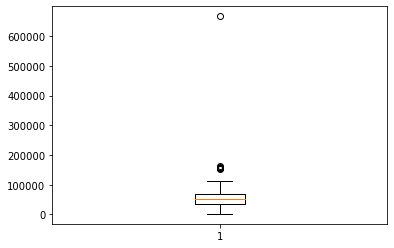

In [39]:
# Feature engineering

# Plot the distribution of a column to visualize the outliers
plt.boxplot(df['Income'])
plt.show()

In [40]:
# Calculate the IQR for the Income column
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers in the Income column
outliers = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]

# Print the number of outliers
print("Number of outliers in the Income column:", len(outliers))

Number of outliers in the Income column: 8


In [41]:
# Remove the outliers in the Income column
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR)))]
print("Updated shape of the dataframe:", df.shape)

Updated shape of the dataframe: (2232, 33)


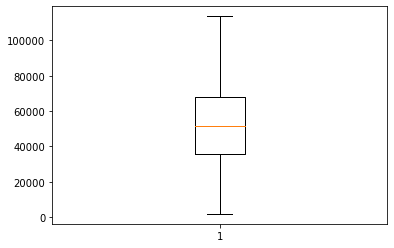

In [42]:
plt.boxplot(df['Income'])
plt.show()


In [43]:
print("Unique values in Education column:", df['Education'].unique())
print("Unique values in Marital_Status column:", df['Marital_Status'].unique())

Unique values in Education column: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique values in Marital_Status column: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [44]:
def education_level(education):
    if education in ['Graduation', 'PhD', 'Master']:
        return 'High'
    elif education in ['Basic']:
        return 'Middle'
    else:
        return 'Low'

df['Education_Level'] = df['Education'].apply(education_level)

def living_status(marital_status):
    if marital_status in ['Alone', 'Absurd', 'YOLO']:
        return 'Living Alone'
    else:
        return 'Living with Others'

df['Living_Status'] = df['Marital_Status'].apply(living_status)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  2232 non-null   int64   
 1   Year_Birth          2232 non-null   int64   
 2   Education           2232 non-null   object  
 3   Marital_Status      2232 non-null   object  
 4   Income              2232 non-null   float64 
 5   Kidhome             2232 non-null   int64   
 6   Teenhome            2232 non-null   int64   
 7   Recency             2232 non-null   int64   
 8   Wines               2232 non-null   int64   
 9   Fruits              2232 non-null   int64   
 10  Meat                2232 non-null   int64   
 11  Fish                2232 non-null   int64   
 12  Sweet               2232 non-null   int64   
 13  Gold                2232 non-null   int64   
 14  Discount_Purchases  2232 non-null   int64   
 15  Web_Purchases       2232 non-null   in

In [46]:
df['Total_Campaigns_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)
df['Average_Spend'] = (df[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']].sum(axis=1)) / df['Discount_Purchases']

In [47]:
df['Spent'] = df["Wines"] +df['Fruits']+ df['Meat'] +df['Fish']+df['Sweet']+ df['Gold']
df['Spend_Per_Campaign'] = df['Total_Campaigns_Accepted'] / df['Spent']
df['Is_Parent'] = (df['Kidhome'] + df['Teenhome'] > 0).astype(int)


In [48]:
# create new feature for total spending in the last 2 years
df['total_spending'] = df['Wines'] + df['Fruits'] + df['Meat'] + df['Fish'] + df['Sweet'] + df['Gold']

# create new feature for average monthly visits to the company's website
df['avg_web_visits'] = df['NumWebVisitsMonth'] / 12

# create new feature for the ratio of online purchases to total purchases
df['online_purchase_ratio'] = df['Web_Purchases'] / (df['Web_Purchases'] + df['Catalog_Purchases'] + df['Store_Purchases'])

In [49]:
# One-Hot Encoding for Education Level and Living Status
df = pd.get_dummies(df, columns=['Education_Level', 'Living_Status'])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2239
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   ID                                2232 non-null   int64   
 1   Year_Birth                        2232 non-null   int64   
 2   Education                         2232 non-null   object  
 3   Marital_Status                    2232 non-null   object  
 4   Income                            2232 non-null   float64 
 5   Kidhome                           2232 non-null   int64   
 6   Teenhome                          2232 non-null   int64   
 7   Recency                           2232 non-null   int64   
 8   Wines                             2232 non-null   int64   
 9   Fruits                            2232 non-null   int64   
 10  Meat                              2232 non-null   int64   
 11  Fish                              2232 non-null   int64 

In [51]:
to_drop = ['Year_Birth', 'Education', 'Marital_Status', 'Age_Cate']
df = df.drop(to_drop, axis=1)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2239
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Income                            2232 non-null   float64
 1   Kidhome                           2232 non-null   int64  
 2   Teenhome                          2232 non-null   int64  
 3   Recency                           2232 non-null   int64  
 4   Wines                             2232 non-null   int64  
 5   Fruits                            2232 non-null   int64  
 6   Meat                              2232 non-null   int64  
 7   Fish                              2232 non-null   int64  
 8   Sweet                             2232 non-null   int64  
 9   Gold                              2232 non-null   int64  
 10  Discount_Purchases                2232 non-null   int64  
 11  Web_Purchases                     2232 non-null   int64  
 12  Catalo

In [56]:
df['NextBestOffer']

0       Wines
1       Wines
2       Wines
3       Wines
4       Wines
        ...  
2235    Wines
2236    Wines
2237    Wines
2238    Wines
2239    Wines
Name: NextBestOffer, Length: 2232, dtype: object

In [57]:
# Select the numerical columns to scale
num_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines', 'Fruits', 
            'Meat', 'Fish', 'Sweet', 'Gold',
            'Discount_Purchases', 'Web_Purchases', 'Catalog_Purchases', 
            'Store_Purchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
            'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 
            'total_spending', 'avg_web_visits', 'online_purchase_ratio', 'Age', 
            'Total_Campaigns_Accepted', 'Is_Parent']

# Initialize the MinMaxScaler
scaler = StandardScaler()

# Fit the scaler to the numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

df_encoded = pd.get_dummies(df, drop_first=True)
df = pd.get_dummies(df, columns=['NextBestOffer'], drop_first=True)


In [65]:
# Check for missing values
print(df.isnull().sum())

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(), inplace=True)


Income                              0
Kidhome                             0
Teenhome                            0
Recency                             0
Wines                               0
Fruits                              0
Meat                                0
Fish                                0
Sweet                               0
Gold                                0
Discount_Purchases                  0
Web_Purchases                       0
Catalog_Purchases                   0
Store_Purchases                     0
NumWebVisitsMonth                   0
AcceptedCmp3                        0
AcceptedCmp4                        0
AcceptedCmp5                        0
AcceptedCmp1                        0
AcceptedCmp2                        0
Complain                            0
Response                            0
Year_Customer                       0
Month_Customer                      0
Day_Customer                        0
Age                                 0
Cluster     

In [67]:
from sklearn.decomposition import PCA

# Initialize the PCA model
pca = PCA(n_components=8)

# Fit and transform the data
df_pca = pca.fit_transform(df)  

df_pca

array([[ 8.37380340e+02,  5.82759254e+02, -1.11302112e+01, ...,
        -4.82745515e-01,  3.18031757e+00,  3.73031287e-01],
       [-6.91599890e+02, -1.00264597e+02, -7.76870765e+00, ...,
         6.42017011e-01, -1.15446590e+00, -1.19570294e-02],
       [ 3.75627370e+02, -1.59034723e+02,  5.21211542e+00, ...,
        -5.78003346e-01, -4.52129635e-01,  1.12111020e+00],
       ...,
       [ 1.03253519e+03, -1.89329510e+02,  9.21692005e+00, ...,
        -1.46705948e-02, -1.29175249e+00, -3.48950009e+00],
       [ 1.86276082e+02,  1.48058204e+02,  8.47501002e+00, ...,
        -1.24439979e-02, -1.55617593e+00,  1.01640751e+00],
       [-5.54919607e+02, -3.49554407e+01, -7.05571774e-01, ...,
        -3.65509812e-01, -4.50854560e-01,  1.02951604e+00]])

In [68]:
from sklearn.metrics import silhouette_score

list_k = list(range(2, 10))
silhouette_scores = []
for k in list_k:
    km = KMeans(n_clusters=k)
    preds = km.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, preds))

best_k = list_k[np.argmax(silhouette_scores)]

In [69]:
best_k

2

In [71]:
df

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,...,Spend_Per_Campaign,Is_Parent,total_spending,avg_web_visits,online_purchase_ratio,Education_Level_High,Education_Level_Low,Education_Level_Middle,Living_Status_Living Alone,Living_Status_Living with Others
0,0.315469,-0.825420,-0.931339,0.307081,0.980281,1.547741,1.735476,2.457243,1.472657,0.839843,...,0.000000,-1.587610,1.682002,0.690949,0.274859,1,0,0,0,1
1,-0.257134,1.031775,0.905012,-0.383851,-0.872949,-0.637496,-0.726318,-0.651911,-0.633057,-0.731254,...,0.000000,0.629878,-0.962227,-0.137299,-0.663364,1,0,0,0,1
2,0.969686,-0.825420,-0.931339,-0.798410,0.359568,0.568152,-0.174694,1.341605,-0.148984,-0.041504,...,0.000000,-1.587610,0.283388,-0.551424,0.575090,1,0,0,0,1
3,-1.213481,1.031775,-0.931339,-0.798410,-0.872949,-0.562143,-0.662493,-0.505598,-0.584649,-0.750414,...,0.000000,0.629878,-0.918988,0.276825,0.024666,1,0,0,0,1
4,0.322994,1.031775,-0.931339,1.550759,-0.391822,0.417446,-0.215724,0.152811,-0.003763,-0.558817,...,0.000000,0.629878,-0.305328,-0.137299,0.221246,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.465247,-0.825420,0.905012,-0.107478,1.200055,0.417446,0.076045,0.079654,2.198765,3.886240,...,0.000000,0.629878,1.223004,-0.137299,1.916748,1,0,0,0,1
2236,0.600751,2.888971,0.905012,0.237988,0.300169,-0.662614,-0.616905,-0.688489,-0.657260,-0.692935,...,0.002252,0.629878,-0.268741,0.690949,1.675938,1,0,0,0,1
2237,0.259296,-0.825420,-0.931339,1.447119,1.791069,0.543035,0.235605,-0.103237,-0.366817,-0.386379,...,0.000806,-1.587610,1.056700,0.276825,-1.810081,1,0,0,0,1
2238,0.854719,-0.825420,0.905012,-1.420249,0.365508,0.090917,0.221929,0.774642,0.068848,0.322531,...,0.000000,0.629878,0.394811,-0.965548,-0.368494,1,0,0,0,1


In [74]:
# Update the features list to match the current DataFrame
features = [col for col in df.columns if col != 'Cluster' and col in df]

# Analyze the Segments
for i in range(best_k):
    print(f"--- Cluster {i} ---")
    segment = df[df['Cluster'] == i]
    print(segment[features].describe())


--- Cluster 0 ---
           Income     Kidhome    Teenhome     Recency       Wines      Fruits  \
count  464.000000  464.000000  464.000000  464.000000  464.000000  464.000000   
mean     1.113592   -0.709346   -0.460379    0.007553    0.761096    1.408728   
std      0.566718    0.466300    0.846916    1.014903    0.875869    1.262208   
min     -2.388352   -0.825420   -0.931339   -1.696622   -0.902648   -0.662614   
25%      0.828016   -0.825420   -0.931339   -0.832957    0.104155    0.392329   
50%      1.150439   -0.825420   -0.931339    0.047981    0.635770    1.246329   
75%      1.459985   -0.825420   -0.931339    0.859827    1.376023    2.351507   
max      3.014678    2.888971    2.741363    1.723492    3.528472    4.335803   

             Meat        Fish       Sweet        Gold  ...  \
count  464.000000  464.000000  464.000000  464.000000  ...   
mean     1.389453    1.408495    1.372504    0.772537  ...   
std      1.130667    1.196681    1.283470    1.174430  ...   
min 